# Overview

* We will analyze two datasets related to Covid-19, Covid-19 World Vaccination Progress by country and Covid -19 death/cases data by country to try.
* We will perfrom hypothesis test to infere if increased Covid-19 vaccination will result in lower Covid-19 case counts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Creating df from both the csv files
covid_cases_df = pd.read_csv('Resource/covid-data.csv')
covid_vacc_df = pd.read_csv('Resource/country_vaccinations.csv')


# updating the df to have columns needed for analysis
covid_vacc_df = covid_vacc_df[['country', 'date', 'iso_code', 'people_vaccinated', \
                               'daily_vaccinations', 'people_vaccinated_per_hundred']]

# converting date object to pandas 'datetime64[ns]' format
covid_vacc_df['date'] = pd.to_datetime(covid_vacc_df['date'])

covid_cases_df = covid_cases_df[['location', 'date', 'iso_code', 'total_cases', 'new_cases', \
                                'total_deaths', 'new_deaths', 'population', 'total_cases_per_million', \
                                 'new_cases_per_million']]

# converting date object to pandas 'datetime64[ns]' format
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])


In [3]:
# Adding total cases per hundred column
covid_cases_df['total_cases_per_hundred'] = (covid_cases_df['total_cases'] / covid_cases_df['population']) * 100

# Dropping the row that contatins world data or continental data
covid_cases_df = covid_cases_df[~covid_cases_df['iso_code'].str.contains('OWID')]

covid_cases_df = covid_cases_df.reset_index(drop=True)

In [4]:
# Dropping the row that contatins world data or continental data
covid_vacc_df = covid_vacc_df[~covid_vacc_df['iso_code'].str.contains('OWID')]

In [5]:
# Grouped max vaccination DF on country
max_covid_vacc_df = covid_vacc_df.groupby(['iso_code'], as_index=False).max().\
                        sort_values(by=['people_vaccinated_per_hundred'], ascending=False).reset_index(drop=True)
max_covid_vacc_df

,iso_code,country,date,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,GIB,Gibraltar,2022-03-24,42034.0,1068.0,124.76
1,NIU,Niue,2022-03-13,1650.0,87.0,102.23
2,PCN,Pitcairn,2021-09-07,47.0,1.0,100.00
3,ARE,United Arab Emirates,2022-03-29,9890318.0,155312.0,98.99
4,PRT,Portugal,2022-03-10,9663542.0,150867.0,95.04
...,...,...,...,...,...,...
212,YEM,Yemen,2022-03-16,643501.0,10240.0,2.11
213,TCD,Chad,2022-03-18,282003.0,4722.0,1.67
214,HTI,Haiti,2022-03-23,163710.0,5695.0,1.42
215,COD,Democratic Republic of Congo,2022-03-24,853971.0,25961.0,0.92


In [6]:
covid_cases_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred
0,Afghanistan,2020-02-24,AFG,5.0,5.0,NaN,NaN,39835428.0,0.126,0.126,0.000013
1,Afghanistan,2020-02-25,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
2,Afghanistan,2020-02-26,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
3,Afghanistan,2020-02-27,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
4,Afghanistan,2020-02-28,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
...,...,...,...,...,...,...,...,...,...,...,...
155326,Zimbabwe,2022-03-01,ZWE,236871.0,491.0,5395.0,0.0,15092171.0,15694.959,32.533,1.569496
155327,Zimbabwe,2022-03-02,ZWE,237503.0,632.0,5396.0,1.0,15092171.0,15736.835,41.876,1.573683
155328,Zimbabwe,2022-03-03,ZWE,237503.0,0.0,5396.0,0.0,15092171.0,15736.835,0.000,1.573683
155329,Zimbabwe,2022-03-04,ZWE,238739.0,1236.0,5397.0,1.0,15092171.0,15818.731,81.897,1.581873


In [7]:
covid_vacc_df.head(395)

,country,date,iso_code,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,Afghanistan,2021-02-22,AFG,0.0,NaN,0.00
1,Afghanistan,2021-02-23,AFG,NaN,1367.0,NaN
2,Afghanistan,2021-02-24,AFG,NaN,1367.0,NaN
3,Afghanistan,2021-02-25,AFG,NaN,1367.0,NaN
4,Afghanistan,2021-02-26,AFG,NaN,1367.0,NaN
...,...,...,...,...,...,...
390,Afghanistan,2022-03-19,AFG,NaN,9838.0,NaN
391,Afghanistan,2022-03-20,AFG,NaN,8665.0,NaN
392,Afghanistan,2022-03-21,AFG,NaN,7492.0,NaN
393,Afghanistan,2022-03-22,AFG,5082824.0,6319.0,12.76


In [8]:
# Grouped max covid cases DF on country
# Sorting the DF based on total cases per hundred
# Dropping the rows with NAN values for total cases and resetting the index

max_covid_case_df = covid_cases_df.groupby(['iso_code'], as_index=False).max()

sort_covid_case_per_hund_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases_per_hundred'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)


# Sorting the DF based on total cases
sort_most_covid_case_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)

In [9]:
# This df shows the most effected countries based on cases per hundred. 
sort_covid_case_per_hund_df

,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
0,FRO,Faeroe Islands,2022-03-05,34658.0,28.0,4.905300e+04,706541.904,70.654190
1,AND,Andorra,2022-03-05,38434.0,151.0,7.735400e+04,496858.598,49.685860
2,DNK,Denmark,2022-03-05,2853236.0,4830.0,5.813302e+06,490811.590,49.081159
3,GIB,Gibraltar,2022-03-05,15622.0,101.0,3.369100e+04,463684.664,46.368466
4,SVN,Slovenia,2022-03-05,902744.0,6351.0,2.078723e+06,434278.160,43.427816
...,...,...,...,...,...,...,...,...
209,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
210,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382
211,CHN,China,2022-03-05,110868.0,4654.0,1.444216e+09,76.767,0.007677
212,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042


In [10]:
# This df shows the most effected countries based on most number of total cases. 
sort_most_covid_case_df

,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
0,USA,United States,2022-03-05,79265726.0,958437.0,3.329151e+08,238095.936,23.809594
1,IND,India,2022-03-05,42962953.0,515036.0,1.393409e+09,30832.980,3.083298
2,BRA,Brazil,2022-03-05,29040800.0,652216.0,2.139934e+08,135708.832,13.570883
3,FRA,France,2022-03-05,23064766.0,139312.0,6.742200e+07,342095.547,34.209555
4,GBR,United Kingdom,2022-03-05,19172095.0,162152.0,6.820711e+07,281086.442,28.108644
...,...,...,...,...,...,...,...,...
209,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042
210,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
211,SHN,Saint Helena,2022-03-05,4.0,NaN,6.095000e+03,656.276,0.065628
212,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382


In [11]:
#mergin two dfs on 'iso-code' and 'date'

merge_df = pd.merge(covid_cases_df, covid_vacc_df, on=['iso_code', 'date'], how='outer')

In [12]:
#verfying the merge df

merge_df.loc[(merge_df['iso_code'] == 'AFG') & (merge_df['date'] == '2022-03-22')]

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
155347,NaN,2022-03-22,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,5082824.0,6319.0,12.76


In [13]:
# Dataframes available to use

#1. covid_vacc_df  ---- raw df with required columns for vaccination record
#2. covid_cases_df ---- raw df with required columns for cases record with added column for "total cases per hundred"
                        # plus data for world and continents are removed from it
    
#3. max_covid_vacc_df ---- data is grouped on country and is sorted with the countries with most people vaccinated
#4. sort_covid_case_per_hund_df ---- data is grouped on country and is sorted with the countries with most cases per hundred
#5. sort_most_covid_case_df ---- data is grouped on country and is sorted with the countries with most cases
#6. merge_df ---- its a merged df 'on=['iso_code', 'date']' containg vaccination and cases record. 




Daily Vaccinations vs. New Cases Over Time

In [14]:
#Identify top 3 countries with most vaccinations per hundred (excluding questionable data, people vaccinated per hundred over 100)
max_covid_vacc_df['iso_code'][3:6]

3    ARE
4    PRT
5    CUB
Name: iso_code, dtype: object

In [15]:
#Create Dataframes for most vaccinations per hundred countries
ARE_df = merge_df.loc[merge_df['iso_code'] == 'ARE']
PRT_df = merge_df.loc[merge_df['iso_code'] == 'PRT']
CUB_df = merge_df.loc[merge_df['iso_code'] == 'CUB']

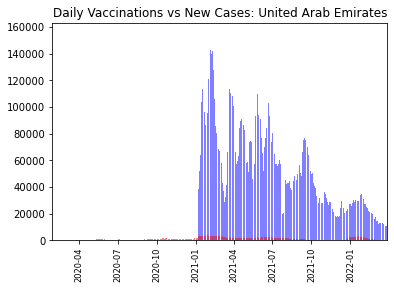

In [16]:
#Create Bar Chart for United Arab Emirates
plt.bar(ARE_df['date'], ARE_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(ARE_df['date'], ARE_df['new_cases'], color='r', alpha=0.5)
plt.xlim(ARE_df['date'].min(), ARE_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: United Arab Emirates")
plt.show()


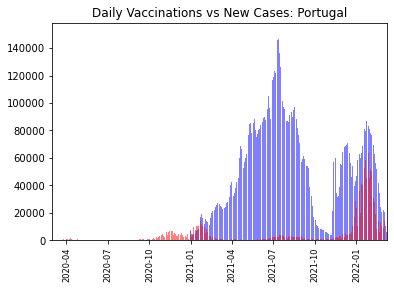

In [17]:
#Create Bar Chart for Portugal
plt.bar(PRT_df['date'], PRT_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(PRT_df['date'], PRT_df['new_cases'], color='r', alpha=0.5)
plt.xlim(PRT_df['date'].min(), PRT_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Portugal")
plt.show()


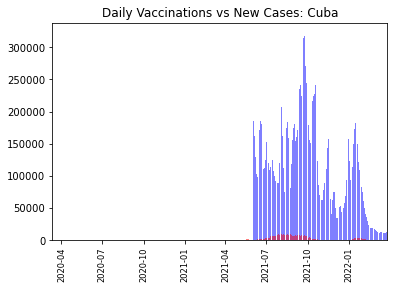

In [18]:
#Create Bar Chart for Cuba
plt.bar(CUB_df['date'], CUB_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(CUB_df['date'], CUB_df['new_cases'], color='r', alpha=0.5)
plt.xlim(CUB_df['date'].min(), CUB_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Cuba")
plt.show()


In [19]:
#Identify top 3 countries with least vaccinations per hundred
max_covid_vacc_df['iso_code'].tail(3)

214    HTI
215    COD
216    BDI
Name: iso_code, dtype: object

In [20]:
#Create Dataframes for countries with most cases per hundred
HTI_df = merge_df.loc[merge_df['iso_code'] == 'HTI']
COD_df = merge_df.loc[merge_df['iso_code'] == 'COD']
BDI_df = merge_df.loc[merge_df['iso_code'] == 'BDI']

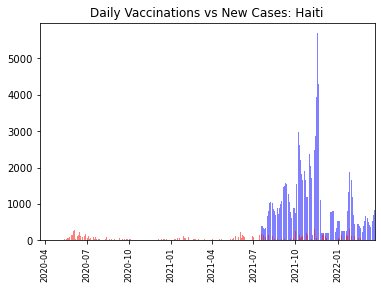

In [21]:
#Create Bar Chart for Haiti
plt.bar(HTI_df['date'], HTI_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(HTI_df['date'], HTI_df['new_cases'], color='r', alpha=0.5)
plt.xlim(HTI_df['date'].min(), HTI_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Haiti")
plt.show()

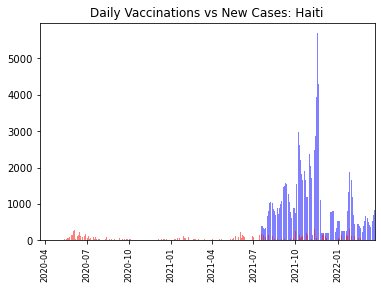

In [22]:
#Create Bar Chart for Haiti
plt.bar(HTI_df['date'], HTI_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(HTI_df['date'], HTI_df['new_cases'], color='r', alpha=0.5)
plt.xlim(HTI_df['date'].min(), HTI_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Haiti")
plt.show()

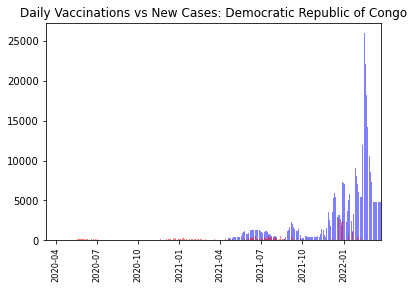

In [23]:
#Create Bar Chart for Democratic Republic of Congo
plt.bar(COD_df['date'], COD_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(COD_df['date'], COD_df['new_cases'], color='r', alpha=0.5)
plt.xlim(COD_df['date'].min(), COD_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Democratic Republic of Congo")
plt.show()

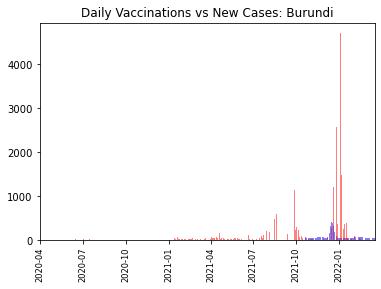

In [24]:
#Create Bar Chart for Burundi
plt.bar(BDI_df['date'], BDI_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(BDI_df['date'], BDI_df['new_cases'], color='r', alpha=0.5)
plt.xlim(BDI_df['date'].min(), BDI_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Burundi")
plt.show()